In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime
sns.set_theme()

In [3]:
regist = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-korshunov-22/shared/problem1-reg_data.csv" , sep=";")
regist.head(3), regist.shape

(      reg_ts  uid
 0  911382223    1
 1  932683089    2
 2  947802447    3,
 (1000000, 2))

In [4]:
auth = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-korshunov-22/shared/problem1-auth_data.csv", sep=';')
auth.head(3), auth.shape

(     auth_ts  uid
 0  911382223    1
 1  932683089    2
 2  932921206    2,
 (9601013, 2))

In [5]:
# Проверка количесвта уникальных Id
auth.uid.nunique(), regist.uid.nunique() 

(1000000, 1000000)

In [6]:
auth.dtypes, regist.dtypes 

(auth_ts    int64
 uid        int64
 dtype: object,
 reg_ts    int64
 uid       int64
 dtype: object)

# Задание 1
**Retention** – один из самых важных показателей в компании. Задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока).

In [58]:
def retention(registration, authentication, from_date=None, to_date=None, plot=None, cmap = None):
    # Для ввода даты нужно вводить в формате datetime 
    '''
    Функция retention принимает на вход два фрейма с предварительной обработкой два фрейма:
    registration - фрейм с uid (УНИКАЛЬНЫЙ ID) и датой регистрации
    authentication - фрейс фрейм с uid (УНИКАЛЬНЫЙ ID) и датой аунтефикации
    
    Также на вход функции подается в формате(datetime) интервал:
    from_date - начало временного промежутка 
    to_date - конец временного промежутка
    
    И параметр отвечающий за рисовку графика - plot 
    Можно выбрать палитру указав в cmap название 
    '''
     
    # Колонки даты регистрации и входа в формате datetime

    registration['Cohorts'] = pd.to_datetime(registration['reg_ts'], unit='s').dt.date
    authentication['auth_date'] = pd.to_datetime(authentication['auth_ts'], unit='s').dt.date
    
    
    # Задаем диапозон времени для просмотра retention
    registration = registration.query('Cohorts >= @from_date')
    authentication = authentication.query('auth_date <= @to_date')

    # Соединяем два фрейма с аунтефикацией и регистрацией в один 
    full_data = pd.merge(authentication, registration, on='uid')
    
    # Считаем количество дней с момента регистрации до захода в приложение 
    full_data['retention_days'] = (full_data.auth_date - full_data.reg_date).dt.days + 1
    
    # Разбиваем на когорты и считаем retention
    cohorts = full_data.groupby(['Cohorts', 'retention_days'])['uid'].nunique().reset_index()
    cohorts_1 = cohorts.pivot(index='Cohorts', columns='retention_days', values='uid')
    retention = cohorts_1.divide(cohorts_1[1], axis=0).round(3)
    
    #Палитра графика 
    if (cmap == None):
        cmap = "rocket"
    else:
        cmap = cmap
    
    # Визуализируем полученные данные
    if (plot) :
        plt.figure(figsize=(20, 14))
        plt.title('Retention')
        sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.1, cmap=cmap)
        plt.show()
    else: 
        return retention.fillna("—")

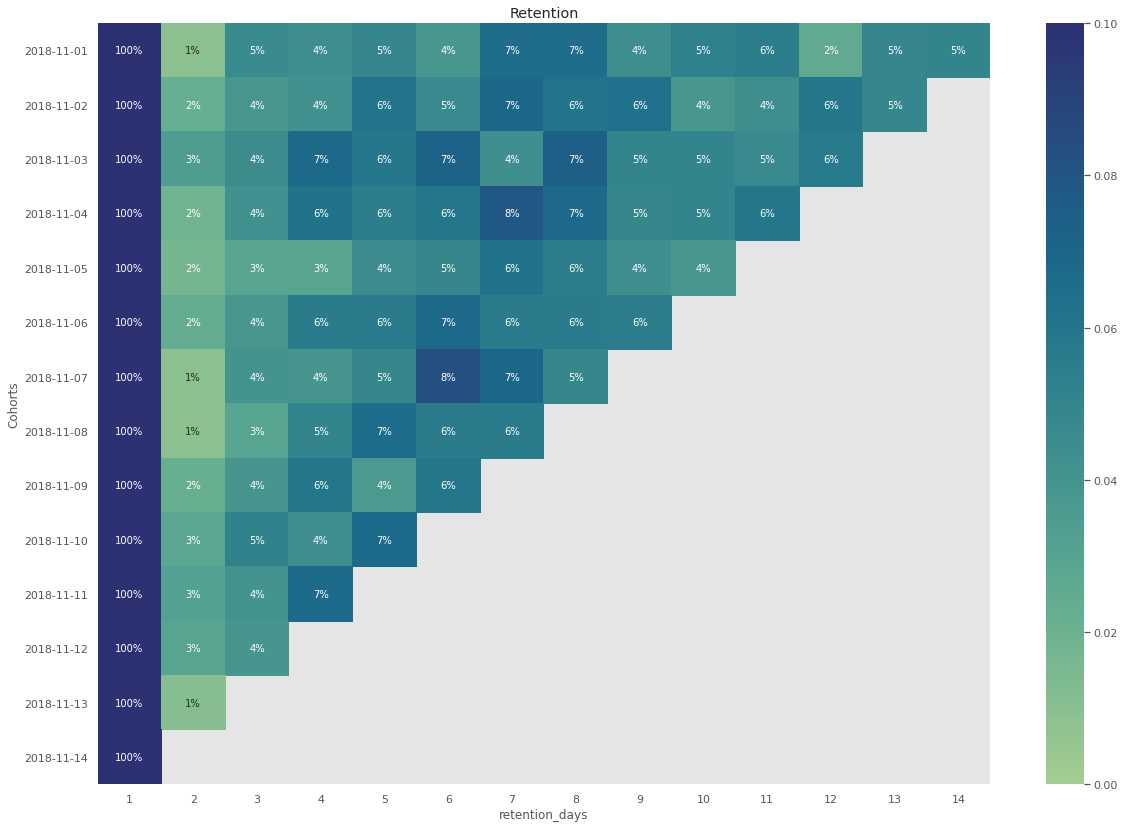

In [159]:
# Работает !!!
retention(regist, auth, datetime.date(2018, 11, 1), to_date=datetime.date(2018, 11, 14), plot=True, cmap="crest")

# Задание 2
Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений. Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной. При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667.

Какой набор предложений можно считать лучшим?

Какие метрики стоит проанализировать для принятия правильного решения и как?

In [14]:
data = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-korshunov-22/final_project/Проект_1_Задание_2.csv", sep=';')
data.head(3)

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404770 entries, 0 to 404769
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    404770 non-null  int64 
 1   revenue    404770 non-null  int64 
 2   testgroup  404770 non-null  object
dtypes: int64(2), object(1)
memory usage: 9.3+ MB


In [66]:
data.describe()

,user_id,revenue
count,404770.000000,404770.000000
mean,202385.500000,26.083435
std,116847.178567,681.652928
min,1.000000,0.000000
25%,101193.250000,0.000000
50%,202385.500000,0.000000
75%,303577.750000,0.000000
max,404770.000000,37433.000000


In [16]:
test_a = data.query('testgroup == "a"')
test_b = data.query('testgroup == "b"')

In [17]:
#Отбор групп где revenue больше 0
control = test_a.query('revenue > 0')
test = test_b.query('revenue > 0')
data_rev = data.query('revenue > 0')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


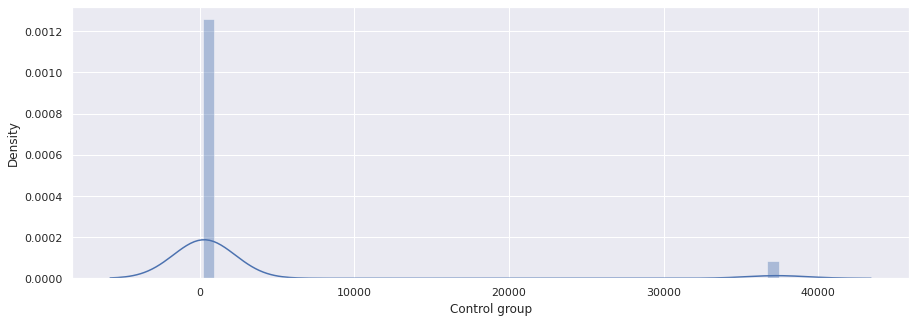

In [110]:
plt.figure(figsize=(15, 5))
sns.distplot(control.revenue)
plt.xlabel('Control group')
plt.show()

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


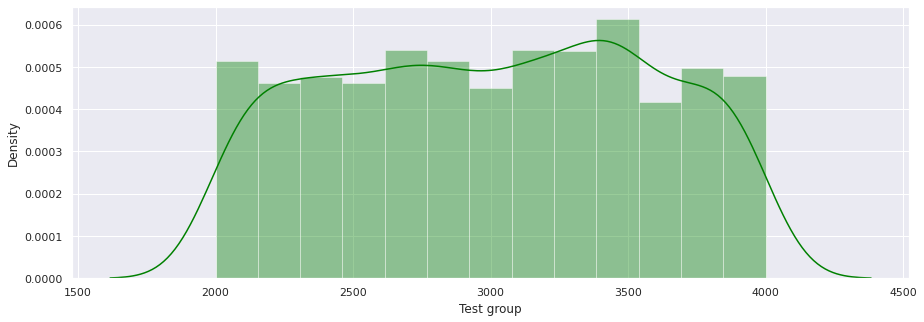

In [109]:
plt.figure(figsize=(15, 5))
sns.distplot(test.revenue, color='green')
plt.xlabel('Test group')
plt.show()


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


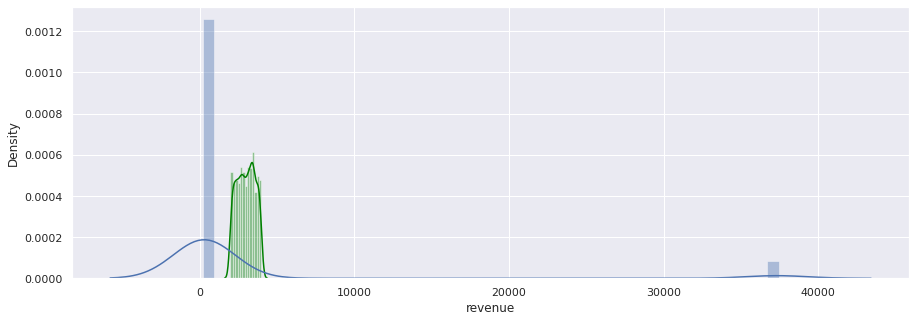

In [105]:
plt.figure(figsize=(15, 5))
sns.distplot(test.revenue, color='green')
sns.distplot(control.revenue)
plt.show()

In [134]:
control_amount = control.query('revenue > 5000').user_id.count()
control_amount_all = control.user_id.count()
print(f"Процент людей, имеющих наибольший вклад в revenue = {(control_amount / control_amount_all * 100).round(4)} %")
print (f"Вклад revenue этой же когорты {round(control.query('revenue > 5000').revenue.sum() / control.revenue.sum() * 100, 4)} %")

Процент людей, имеющих наибольший вклад в revenue = 6.3797 %
Вклад revenue этой же когорты 89.3708 %


<Figure size 1080x360 with 0 Axes>

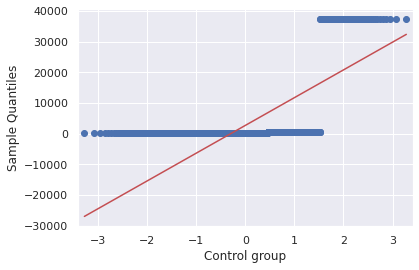

<Figure size 1080x360 with 0 Axes>

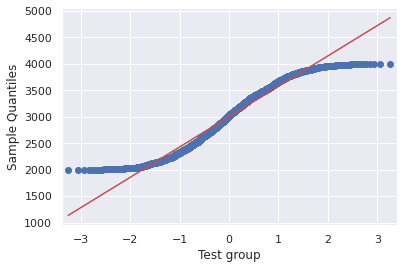

In [132]:
import statsmodels.api as statsmodel
plt.figure(figsize=(15, 5))
statsmodel.qqplot(control.revenue, line = 's')
plt.xlabel('Control group')


plt.figure(figsize=(15, 5))
statsmodel.qqplot(test.revenue, line = 's')
plt.xlabel('Test group')
plt.show()

Судя по графикам можно сделать вывод, что:

1.В контрольной группе распределение мультимодльное, точно не явялется нормальным. Также можно  выделить группу пользователей (123 человека) это 6.4 %, вклад которых в revenue 90 % . 

2.В тестовой группе распределение бимодальное, но уже  больше похоже на нормальное. Все пользователи платят меньше 5000

In [57]:
# Проанализируем метрики


#Объявим фрейм метрик
metrics = pd.DataFrame(columns=['control', 'test'])


#ARPPU
test_arppu = test.revenue.sum() / test.shape[0]
control_arppu = control.revenue.sum() / control.shape[0]
metrics = metrics.append({'test':test_arppu,'control':control_arppu}, ignore_index=True)

#ARPU
test_arpu = test_b.revenue.sum() / test_b.shape[0]
control_arpu = test_a.revenue.sum() / test_a.shape[0]
metrics = metrics.append({'test':test_arpu,'control':control_arpu}, ignore_index=True)

#Conversion
test_conv = (test.shape[0] / test_b.shape[0]) * 100
control_conv = (control.shape[0] / test_a.shape[0]) * 100
metrics = metrics.append({'test':test_conv,'control':control_conv}, ignore_index=True)

#Mean
test_mean = test.revenue.mean()
control_mean = control.revenue.mean()
metrics = metrics.append({'test' : test_mean,'control' : control_mean}, ignore_index=True)

#Median
test_median = np.median(test['revenue'])
control_median = np.median(control['revenue'])
metrics = metrics.append({'test' : test_median,'control' : control_median}, ignore_index=True)

 

my_index = ['ARPPU', 'ARPU', 'Conversion', 'Mean', 'Median']
metrics.index = my_index

metrics.apply(lambda x : round(x, 2)) 

,control,test
ARPPU,2664.00,3003.66
ARPU,25.41,26.75
Conversion,0.95,0.89
Mean,2664.00,3003.66
Median,311.00,3022.00


Применим Normaltest - тест на нормальность, а также  проверим на  гомогенность дисперсий наших выборок с помощью критерия Левена.

In [142]:
print(f"Normaltest for control == {stats.normaltest(control.revenue)}")

Normaltest for control == NormaltestResult(statistic=1394.9457843086925, pvalue=1.2341605505935488e-303)


In [146]:
print(f"Normaltest for test == {stats.normaltest(test.revenue)}")

Normaltest for test == NormaltestResult(statistic=1068.8600084412267, pvalue=7.943249488371762e-233)


In [148]:
print(f"Normaltest for sample == {stats.levene(control.revenue, test.revenue)}")

Normaltest for sample == LeveneResult(statistic=80.85567421779912, pvalue=3.779689868667878e-19)


p-value < 0.05 => Отклоняем нулевую гипотезу о равенстве дисперсий

Таким образом, примрименение t-теста в данном случае бессмысленно поскольку,в выборке у нас наблюдается ненормальности распределений и негомогенности дисперсий

Применим непараметрический критерий Манна-Уитни, который менее чувствителен к экстремальным отклонениям от нормальности

In [149]:
stats.mannwhitneyu(control.revenue, test.revenue)

MannwhitneyuResult(statistic=222015.0, pvalue=0.0)

Вывод по критерию Манна-Уитни: p-value < 0.05 => следовательно отклоняем нулевую гипотезу о равенстве распределений. 

Проверим наши данные с помощью метода **bootstrap**  

In [157]:
def get_bootstrap(
    test, 
    control, 
    boot_it = 1000, 
    statistic = np.mean, 
    bootstrap_conf_level = 0.95 
):
    boot_len = max([len(test), len(control)])
    boot_data = []
    
    for i in range(boot_it): 
        samples_1 = test.sample(boot_len, replace = True ).values
        samples_2 = control.sample(boot_len, replace = True).values
        boot_data.append(statistic(samples_1-samples_2)) 
        
    pd_boot_data = pd.DataFrame(boot_data)
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
    p_1 = stats.norm.cdf(x = 0, loc = np.mean(boot_data), scale = np.std(boot_data))
    p_2 = stats.norm.cdf(x = 0, loc = -np.mean(boot_data), scale = np.std(boot_data))
    p_value = min(p_1, p_2) * 2
    
    plt.hist(pd_boot_data[0], bins = 50)
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
              
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

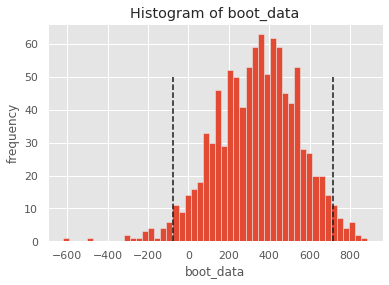

In [158]:
bootstrap_test1 = get_bootstrap(test.revenue, control.revenue, statistic=np.mean) 

In [152]:
print(f"Bootstrap's p-value = {bootstrap_test1['p_value'].round(5)} ")

Bootstrap's p-value = 0.09946 


In [153]:
bootstrap_test1['ci']

,0
0.025,-70.472381
0.975,726.897653


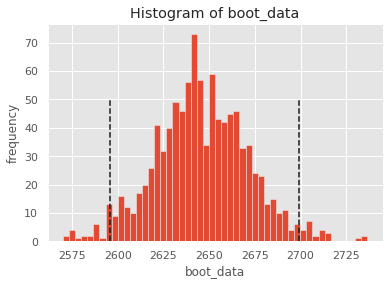

In [156]:
bootstrap_test2 = get_bootstrap(test.revenue, control.revenue, statistic=np.median)

**Общий вывод**:

1.Распределения в наших группах значительно разняться. В тестовой все пользователи платят в интервале от 2-ух до 4-ех **к**, а в контроле иначе. Более 90% пользователей вносят крайне малые суммы, и 6.4% людей составляют 90 % прибыли.

2.Проведение A/B теститрования не показало существенных различий в выручке.

3.Какой вариант лучше? Тест или контроль? Я бы предпочел оставить контроль. Так как в случае потери нескольких пользователей (в тетстовой группе), если они окажутся из когорты многоплатящих, приведет к значительному снижение доходов, а в контроле вряд ли такое случится т.к. все пользователи платят в пределах среднего.

# Задание 3

В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. В них игроки могут получить уникальные предметы для сада и персонажей, дополнительные монеты или бонусы. Для получения награды требуется пройти ряд уровней за определенное время. С помощью каких метрик можно оценить результаты последнего прошедшего события?

Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?

**Первое событие**

DAU, WAU, MAU - количество уникальных пользователей за сутки/неделю/месяц. Можно сравнить количество пользователей в дни с тематическими событиями и в обычные дни

Retention - удержание пользователя, которые уже были в игре + процент пользователей, которые вернулись  в игру во время тематического события

Конверсия (CR) — отношение числа пользователей, которые выполнили какое-либо целевое действие к общему числу 
пользователей

ARPU и ARPPU - отслеживание транзакций во время ивента для получения дополнительных наград 

**Второе событие**

Churn rate - как изменился отток клиентов

Уровень на котором происходит наибольший отток клиентов

Среденее кол-во откатов пользователей, среднее кол-во попыток прохождения уровней

Среднее количество пройденных уровней за событие

Средняя продолжительность на прохождение уровня